# <a id='toc1_'></a>[Data Visualization](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Data Visualization](#toc1_)    
  - [I. Data Import](#toc1_1_)    
  - [II. Data Overview](#toc1_2_)    
    - [II.1. Create column 'month'](#toc1_2_1_)    
  - [III. Data Visualization](#toc1_3_)    
    - [III.1. Set up parameters](#toc1_3_1_)    
    - [III.2. Correlation heatmap](#toc1_3_2_)    
    - [III.3. Scatterplots](#toc1_3_3_)    
    - [III.4. Pair plot](#toc1_3_4_)    
    - [III.5. Categorical plot](#toc1_3_5_)    
  - [IV. Answer Business Questions & Develop Hypothesis](#toc1_4_)    
    - [IV.1. Answer business question: "How does experience level affect income?"](#toc1_4_1_)    
    - [IV.2. Develop hypotheses](#toc1_4_2_)    
  - [V. Data Export](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[I. Data Import](#toc0_)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [3]:
# read dataset 'salary-consistent.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-consistent.pkl'))

## <a id='toc1_2_'></a>[II. Data Overview](#toc0_)

In [4]:
# make sure pandas display all rows & columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# check outputs of df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed
0,0,2017,1/5/2017 5:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked
1,1,2017,1/5/2017 5:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked
2,2,2017,1/5/2017 5:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked


In [6]:
# check number of rows and columns
df.shape

(6860, 27)

In [7]:
# get basic statistics
df.describe()

,id,survey_year,salary_in_usd,years_of_exp_with_primary_db,years_of_exp_with_data_jobs,number_of_db_servers,hours_worked_per_week
count,6860.00,6860.00,6860.00,6860.00,6860.00,6860.00,6860.00
mean,3442.53,2017.71,92487.91,10.80,7.17,257.19,43.12
std,1990.99,0.68,50504.61,6.07,6.33,6276.04,6.48
min,0.00,2017.00,1050.00,0.00,0.00,0.00,3.00
25%,1717.75,2017.00,65000.00,6.00,3.00,6.00,40.00
50%,3438.50,2018.00,90000.00,10.00,5.00,20.00,40.00
75%,5163.25,2018.00,115000.00,15.00,10.00,70.50,45.00
max,6892.00,2019.00,1000000.00,38.00,40.00,500000.00,100.00


### <a id='toc1_2_1_'></a>[II.1. Create column 'month'](#toc0_)

In [8]:
# convert column timestamp to a datetime datatype
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
# extract the month into new columns
df['month'] = df['timestamp'].dt.month

In [12]:
# check the dataframe
df.sample(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month
5009,5009,2018,2017-12-20 12:22:13,22000.00,Argentina,Microsoft SQL Server,5,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",No,5,Not Asked,1,Not Asked,2,Associates (2 years),Yes,"No, I never have",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same role, but change employers",DBA (General - splits time evenly between writ...,"Build scripts & automation tools, Manual tasks...",12
1852,1852,2017,2017-01-09 08:03:05,50000.00,Italy,Microsoft Access,17,"Microsoft SQL Server, MongoDB",Full time employee,Analyst,No,5,Not Asked,None,Not Asked,3,Associates (2 years),No,"Yes, and they're currently valid",37,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1
5717,5717,2018,2017-12-29 13:47:25,120000.00,United States,Microsoft SQL Server,16,Not Provided,Full time employee,Manager,Yes,1,Not Asked,2,Not Asked,5,Bachelors (4 years),Yes,"Yes, but they expired",50,5 or more,Not Asked,Private business,No,"Stay with the same employer, same role",Not Provided,Training/teaching,12


## <a id='toc1_3_'></a>[III. Data Visualization](#toc0_)

### <a id='toc1_3_1_'></a>[III.1. Set up parameters](#toc0_)

In [9]:
# set up the parameters
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Lucida Console'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

### <a id='toc1_3_2_'></a>[III.2. Correlation heatmap](#toc0_)

In [20]:
# current columns
df.columns

Index(['id', 'survey_year', 'timestamp', 'salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month'],
      dtype='object')

In [10]:
# create a subset excluding columns: 'id', 'survey_year', 'timestamp', 'month'
sub = df[['salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month']]

KeyError: "['month'] not in index"

In [29]:
sub.sample(5)

,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month
6042,54409.68,Ireland,Microsoft SQL Server,3,"PostgreSQL, Azure SQL DB, Amazon RDS (any flavor)",Full time employee,DBA (Production Focus - build & troubleshoot s...,No,3,2 (I worked at another similar position elsewh...,None,100-249,10,Masters,Yes,"No, I never have",45,"None, or less than 1 day per week",20K-99K (large town),Private business,"Yes, but only passively (just curious)","Stay with the same employer, but change roles","Analyst, Architect, Developer: Business Intell...","Build scripts & automation tools, Manual tasks...",12
5109,60000.00,Jersey,Microsoft SQL Server,7,Azure SQL DB,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",No,7,Not Asked,4,Not Asked,20,Bachelors (4 years),Yes,"Yes, and they're currently valid",35,1,Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same employer, but change roles","Analyst, DBA (Development Focus - tunes querie...","Build scripts & automation tools, Meetings & m...",12
291,300000.00,United States,Microsoft SQL Server,14,"Oracle, Microsoft Access",Independent or freelancer or company owner,Engineer,No,18,Not Asked,None,Not Asked,50,Associates (2 years),Not Provided,"Yes, but they expired",50,5 or more,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1
3996,61000.00,Canada,Microsoft SQL Server,11,Azure SQL DB,Full time employee,DBA (General - splits time evenly between writ...,No,7,Not Asked,None,Not Asked,20,Bachelors (4 years),No,"Yes, but they expired",40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)","Stay with the same role, but change employers","Developer: Business Intelligence (SSRS, PowerB...","Build scripts & automation tools, Manual tasks...",12
4404,72000.00,Sweden,Microsoft SQL Server,10,"MySQL/MariaDB, Azure SQL DB",Full time employee of a consulting/contracting...,"DBA (Development Focus - tunes queries, indexe...",No,2,Not Asked,None,Not Asked,200,None (no degree completed),Not Provided,"Yes, but they expired",36,"None, or less than 1 day per week",Not Asked,Private business,No,"Stay with the same employer, but change roles",DBA (General - splits time evenly between writ...,"Build scripts & automation tools, Manual tasks...",12


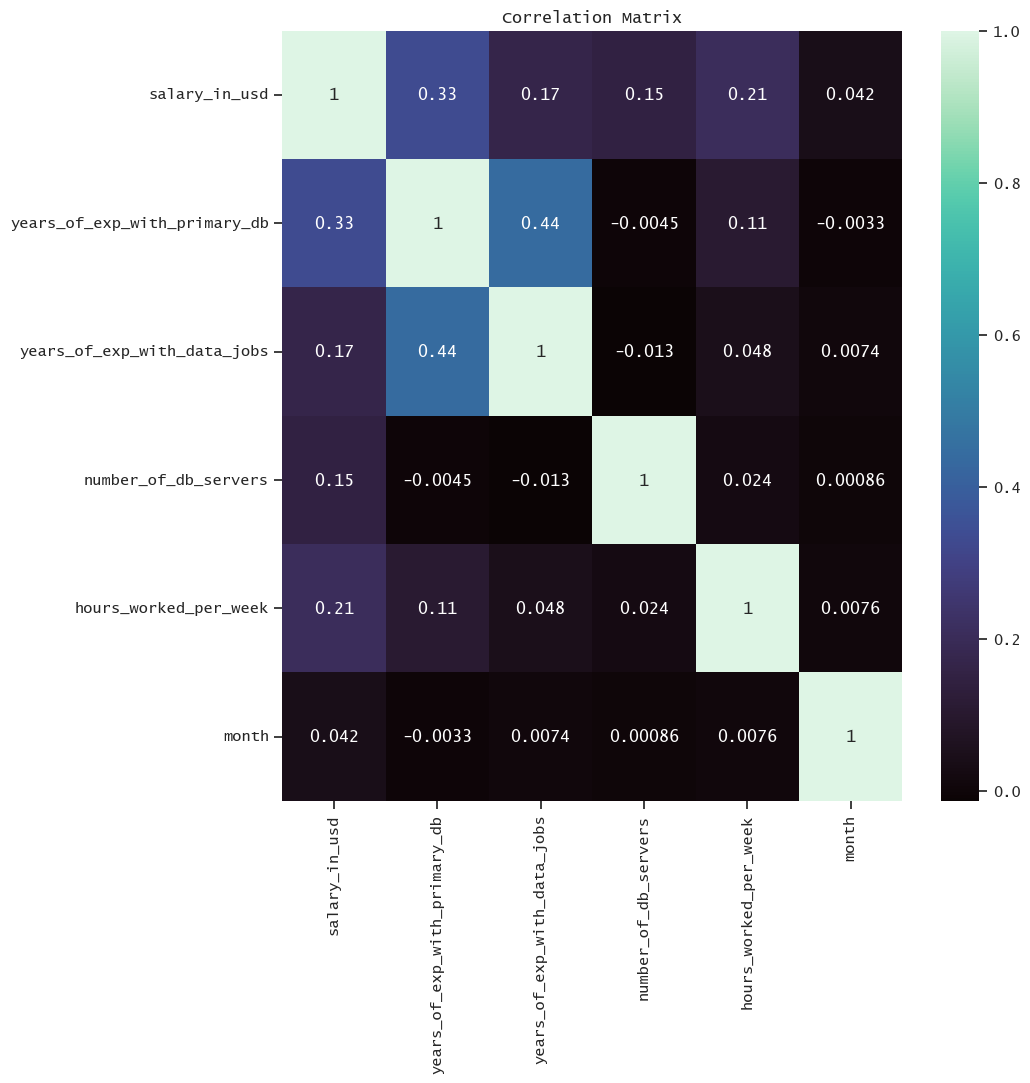

In [98]:
# create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
heatmap_corr = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap='mako')

# set the title
ax.set_title("Correlation Matrix")

# show the plot
plt.show()

**Research question: "How does experience level affect income?"**

- A **0.33** coefficient between *Salary* and *Years of experience with primary database* means that there is a moderate positive correlation between these two variables. This means that as the *Years of experience with primary database* increases, the *Salary* tends to increase as well. However, the correlation is not very strong, and there may be other factors that are also influencing income.

- At the same time, a coefficient of **0.17** between *Salary* and *Years of experience with data jobs* suggests a weaker positive relationship, indicating that while there is still a positive correlation between the two variables, it is not as strong as the relationship between salary and years of experience with primary database.

- A **0.21** coefficient between *Salary* and *Hours worked per week* means that there is a weak positive correlation between these two variables. As the coefficient is positive, it indicates that there is a tendency for higher salaries to be associated with more hours worked per week, but the strength of this relationship is weak.

- On the other hand, *Years of experience with data jobs* has a **0.17** coefficient on *Salary* indicates a weak positive correlation between these two variables. This means that as *Years of experience with data jobs* increases, *Salary* also tends to increase, but the relationship between the two variables is not very strong.

- Lastly, a correlation coefficient of **0.44** between *Years of experience with data jobs* and *Years of experience with primary database* indicates a moderate positive correlation between the two variables. This means that as the years of experience with data jobs increase, the years of experience with the primary database also tend to increase. One possible reason for this relationship is that individuals who have more experience with data jobs are more likely to have worked with the primary database for a longer period of time. As they gain more experience with data jobs, they may also become more proficient with the primary database, leading to an increase in their years of experience with it. Another possibility is that companies tend to hire individuals with more experience with the primary database for data-related jobs, leading to a positive correlation between the two variables.

In addition, the majority of the coefficient values are less than 0.1, indicating that the relationship between the variables is mostly weak or non-existent.

### <a id='toc1_3_3_'></a>[III.3. Scatterplots](#toc0_)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


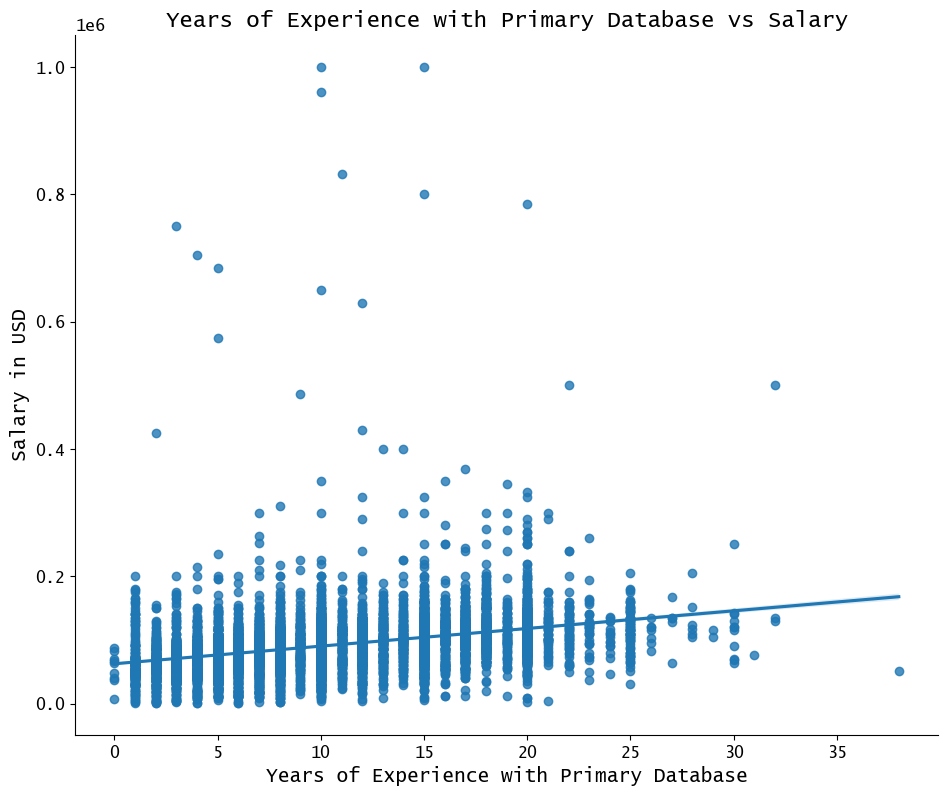

In [11]:
# create the scatterplot
scatter_salary_yoe_with_primary_db = sns.lmplot(data=df, x='years_of_exp_with_primary_db', y='salary_in_usd', palette='mako', height=8, aspect=1.2)

# set the x-axis formatter to display values in hundred thousand
scatter_salary_yoe_with_primary_db.set(xticklabels=[format(int(x), ',') for x in scatter_salary_yoe_with_primary_db.ax.get_xticks()])
scatter_salary_yoe_with_primary_db.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# set the plot title and axis labels
plt.title('Years of Experience with Primary Database vs Salary', fontsize = 16, fontweight = 'bold')
plt.xlabel('Years of Experience with Primary Database', fontsize = 14, fontweight = 'bold')
plt.ylabel('Salary in USD', fontsize = 14, fontweight = 'bold')

# show the plot
plt.show()

**Observation:**

The moderate positive correlation between *Salary* and *Years of experience with primary database* is indicated by the coefficient of 0.33, with the trendline showing an increase in one variable tending to lead to an increase in the other.

The scatterplot reveals that salaries mostly fall below $200,000, with few sporadic instances between $400,000 and $1,000,000. It is also possible that the sporadic high salaries are outliers or represent a small number of individuals in unique or highly specialized roles. Additionally, factors such as geographic location and education level may also impact salary levels and contribute to the observed pattern in the data.

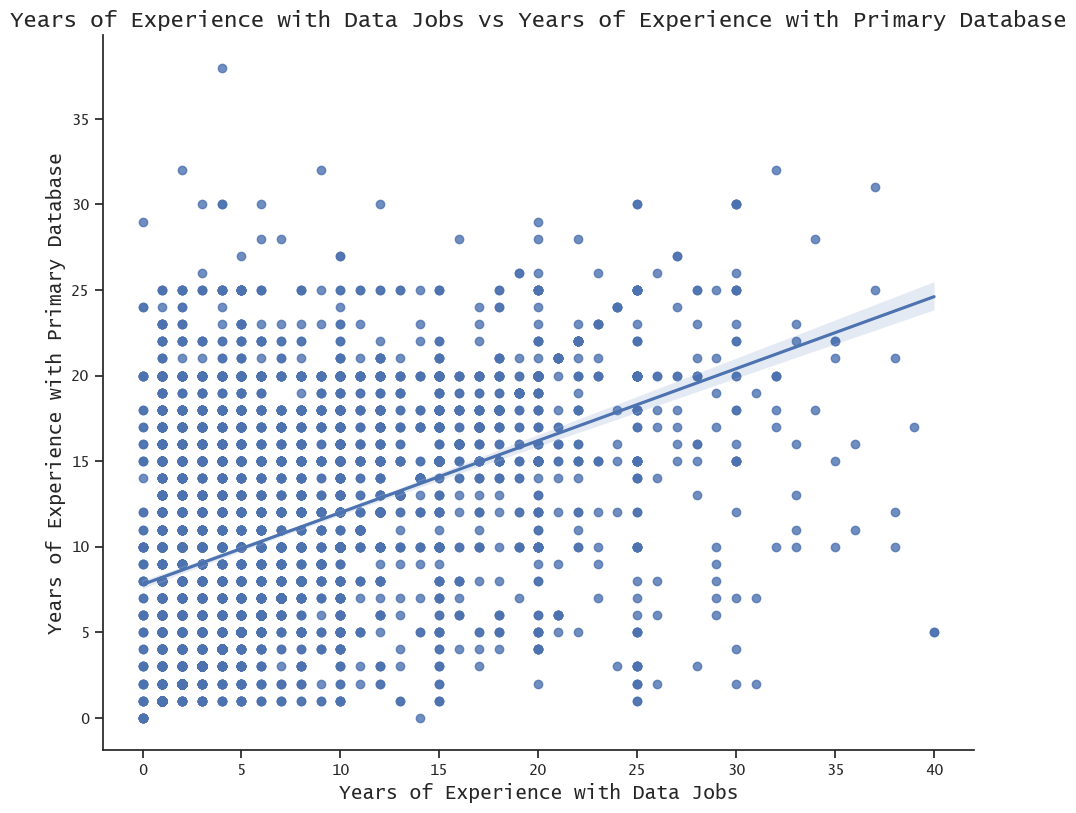

In [100]:
# create the scatterplot
scatter_yoe_with_data_jobs_yoe_with_primary_db = sns.lmplot(data=df, x='years_of_exp_with_data_jobs', y='years_of_exp_with_primary_db', palette='mako', height=8, aspect=1.2)

# set the plot title and axis labels
plt.title('Years of Experience with Data Jobs vs Years of Experience with Primary Database', fontsize = 16, fontweight = 'bold')
plt.xlabel('Years of Experience with Data Jobs', fontsize = 14, fontweight = 'bold')
plt.ylabel('Years of Experience with Primary Database', fontsize = 14, fontweight = 'bold')

# show the plot
plt.show()

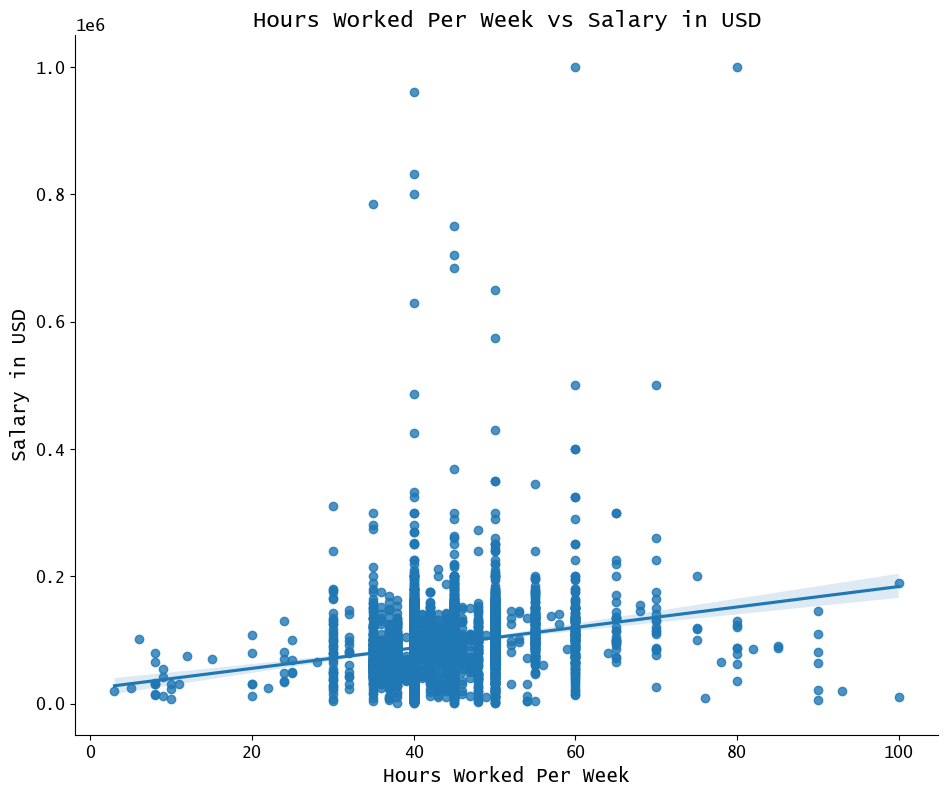

In [12]:
# create the scatterplot
scatter_work_hours_per_week = sns.lmplot(data=df, x='hours_worked_per_week', y='salary_in_usd', palette='mako', height=8, aspect=1.2)

# set the plot title and axis labels
plt.title('Hours Worked Per Week vs Salary in USD', fontsize = 16, fontweight = 'bold')
plt.xlabel('Hours Worked Per Week', fontsize = 14, fontweight = 'bold')
plt.ylabel('Salary in USD', fontsize = 14, fontweight = 'bold')

# show the plot
plt.show()

### <a id='toc1_3_4_'></a>[III.4. Pair plot](#toc0_)

In [60]:
# create a subset of varibles for the pair plots
sub_2 = sub[['salary_in_usd', 'years_of_exp_with_primary_db', 'years_of_exp_with_data_jobs', 'hours_worked_per_week']]

In [61]:
sub_2

,salary_in_usd,years_of_exp_with_primary_db,years_of_exp_with_data_jobs,hours_worked_per_week
0,200000.00,10,5,45
1,61515.00,15,3,35
2,95000.00,5,25,45
3,56000.00,6,2,40
4,35000.00,10,10,40
...,...,...,...,...
6888,32000.00,3,3,40
6889,32000.00,3,3,40
6890,40000.00,10,19,40
6891,130000.00,20,17,42


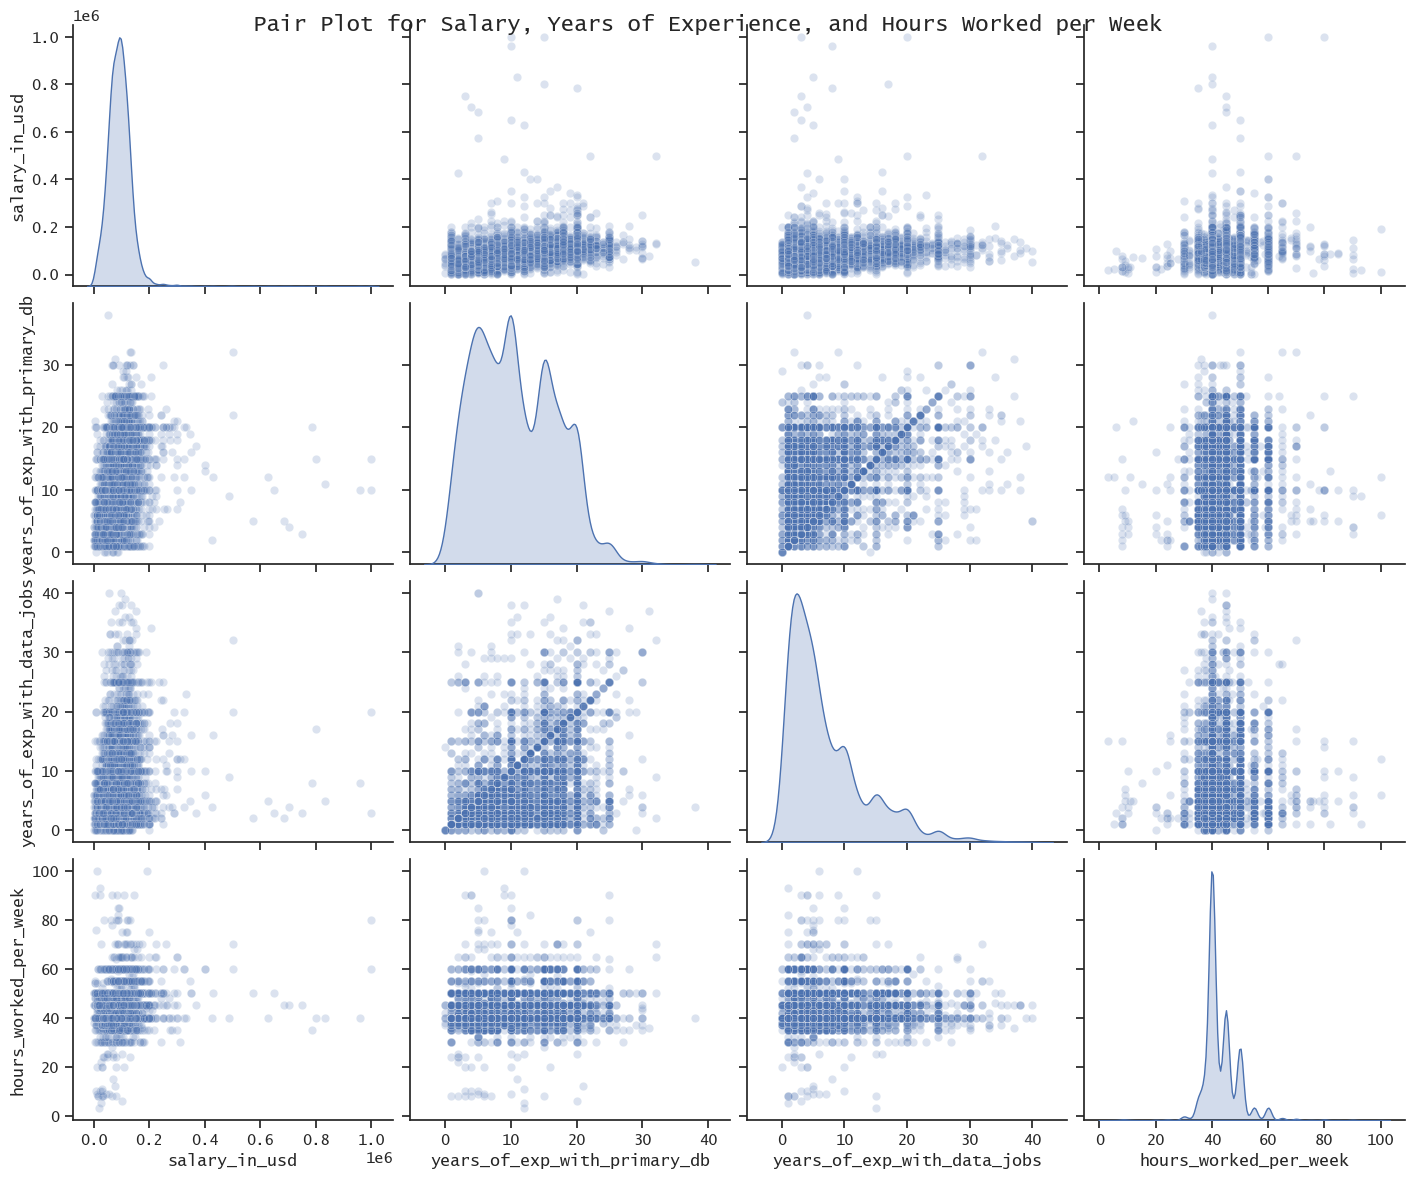

In [101]:
# create a pair plot 
pair_plot = sns.pairplot(sub_2, diag_kind='kde', plot_kws={'alpha': 0.2}, height=3, aspect=1.2, palette='mako')

# add a title to the plot
plt.suptitle('Pair Plot for Salary, Years of Experience, and Hours Worked per Week', fontsize=16, fontweight='bold')

plt.show()

**Observation:**

- Salary: The majority of salaries fall under $200,000.

- Years of experience with primary database: Most respondents have between 0 to 20 years of experience with primary databases, with only a few respondents having 30 to 40 years of experience. There seems to be a positive relationship between years of experience with primary databases and years of experience with data jobs.

- Years of experience with data jobs: The majority of respondents have between 0 to 10 years of experience with data jobs, with a few respondents having 10 to 40 years of experience.

- Hours worked per week: Most respondents work about 40 hours per week, with some working up to 100 hours per week.

### <a id='toc1_3_5_'></a>[III.5. Categorical plot](#toc0_)

C:\Users\Ansgar.S\AppData\Local\Temp\ipykernel_13148\2046665116.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist.set_xticklabels([format(int(x), ',') for x in hist.get_xticks()])


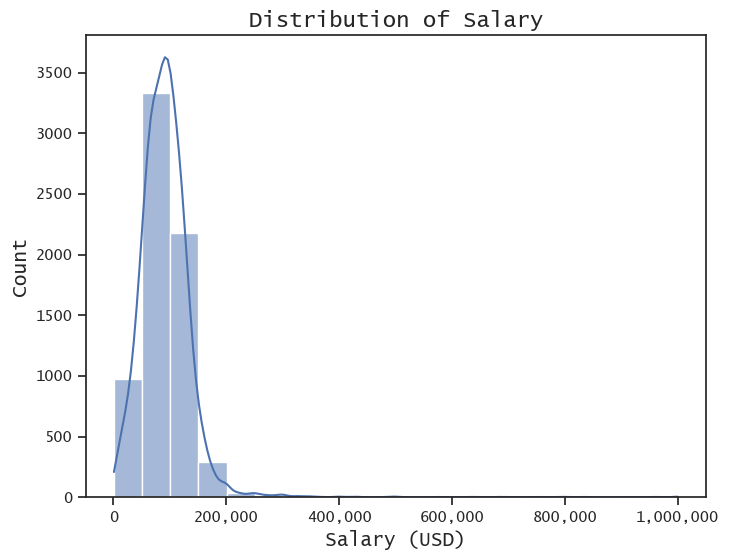

In [106]:
# create a histogram of salary_in_usd
hist = sns.histplot(df['salary_in_usd'], bins=20, kde=True, palette='mako')

# set the x-axis formatter to display values in hundred thousand
hist.set_xticklabels([format(int(x), ',') for x in hist.get_xticks()])
hist.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# set the plot title and axis labels
plt.title('Distribution of Salary', fontsize=16, fontweight='bold')
plt.xlabel('Salary (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# show the plot
plt.show()

In [12]:
# define the bin edges
bin_edges = [0, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 750000, 1000000]

# define the bin labels
bin_labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-400K', '400K-500K', '500K-750K', '750K-1M']

# add a new column to the dataframe with the salary categories
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bin_edges, labels=bin_labels)

In [14]:
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,...,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.0,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.0,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.0,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


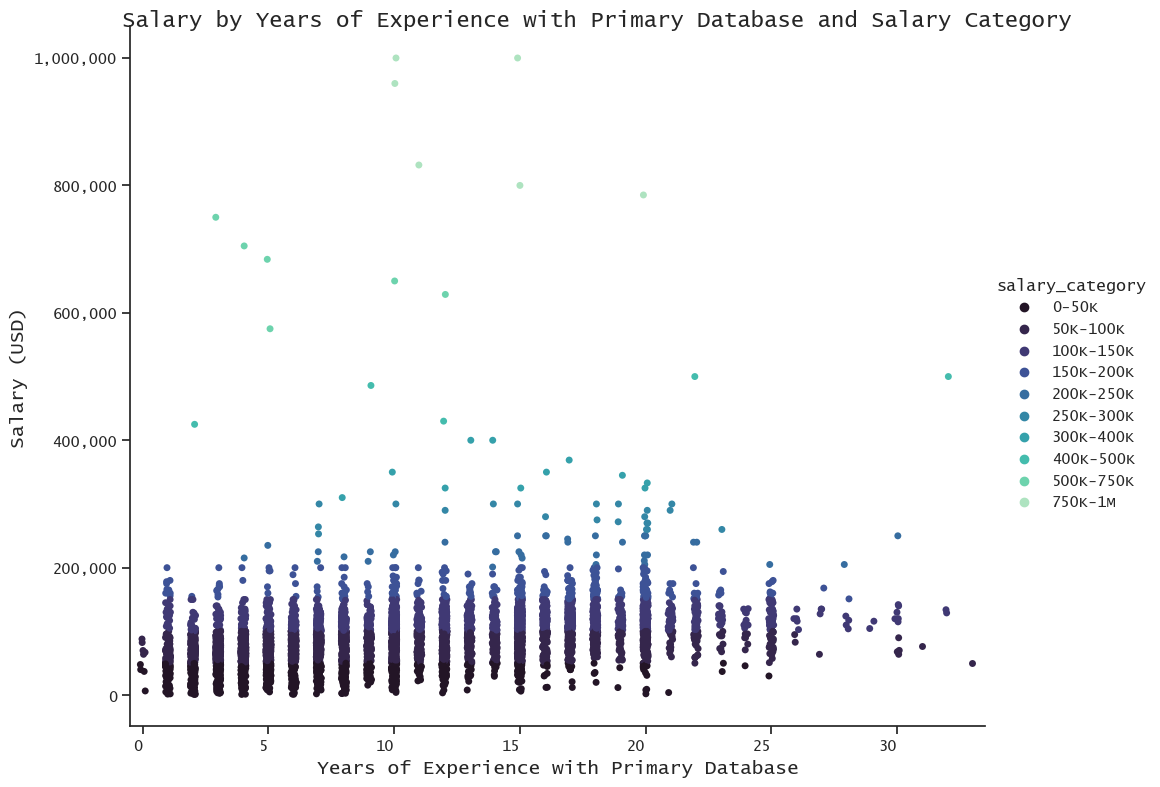

In [16]:
# Create a categorical plot in seaborn using the salary categories created above
sns.set(style='ticks', font='Lucida Console')
cat_plot = sns.catplot(x='years_of_exp_with_primary_db', y='salary_in_usd', hue='salary_category', data=df, height=8, aspect=1.2, palette='mako')

# Set up the parameters
cat_plot.fig.suptitle('Salary by Years of Experience with Primary Database and Salary Category', fontsize=16, fontweight='bold')
cat_plot.set_xlabels('Years of Experience with Primary Database', fontsize=14, fontweight='bold')
cat_plot.set_ylabels('Salary (USD)', fontsize=14, fontweight='bold')
cat_plot.ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
cat_plot.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.show()

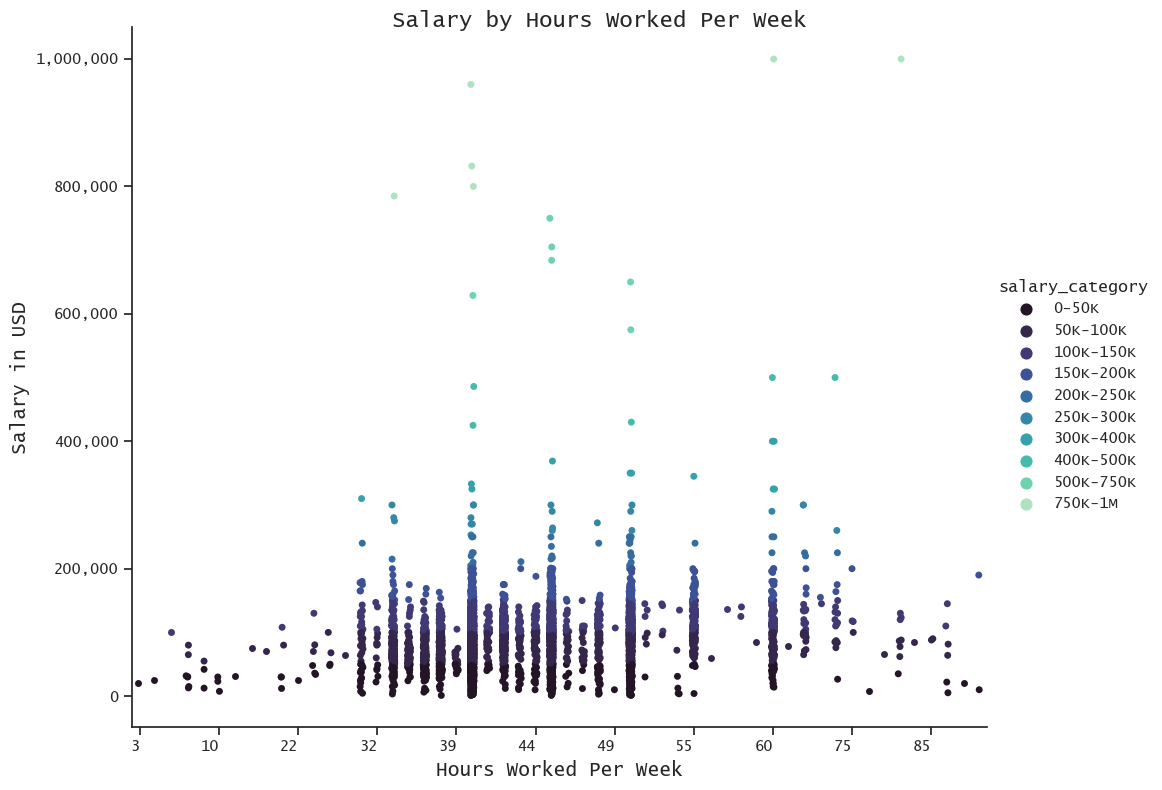

In [19]:
# Create a categorical plot in seaborn using the salary categories created above
sns.set(style='ticks', font='Lucida Console')
cat_plot_2 = sns.catplot(x='hours_worked_per_week', y='salary_in_usd', hue='salary_category', data=df, height=8, aspect=1.2, palette='mako')

# Set up the parameters
cat_plot_2.fig.suptitle('Salary by Hours Worked Per Week', fontsize=16, fontweight='bold')
cat_plot_2.set_xlabels('Hours Worked Per Week', fontsize=14, fontweight='bold')
cat_plot_2.set_ylabels('Salary in USD', fontsize=14, fontweight='bold')
cat_plot_2.ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
cat_plot_2.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.show()

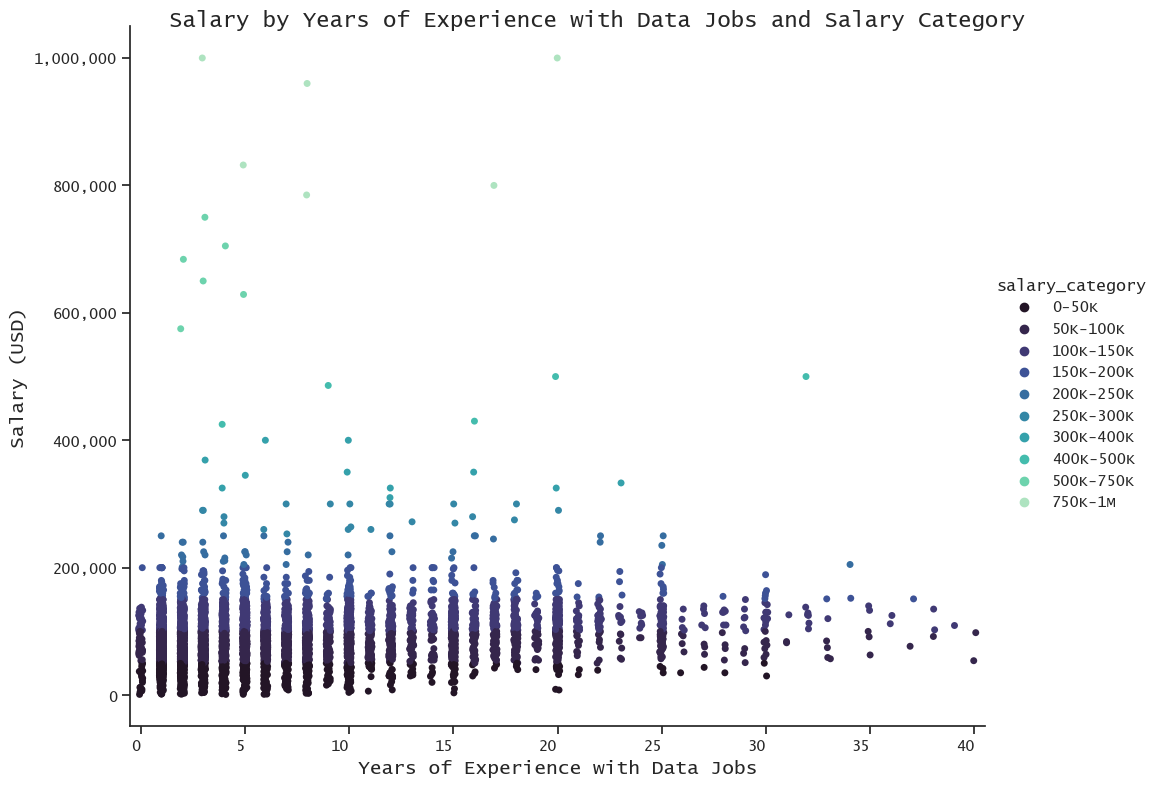

In [14]:
# Create a categorical plot in seaborn using the salary categories created above
sns.set(style='ticks', font='Lucida Console')
cat_plot_3 = sns.catplot(x='years_of_exp_with_data_jobs', y='salary_in_usd', hue='salary_category', data=df, height=8, aspect=1.2, palette='mako')

# Set up the parameters
cat_plot_3.fig.suptitle('Salary by Years of Experience with Data Jobs and Salary Category', fontsize=16, fontweight='bold')
cat_plot_3.set_xlabels('Years of Experience with Data Jobs', fontsize=14, fontweight='bold')
cat_plot_3.set_ylabels('Salary (USD)', fontsize=14, fontweight='bold')
cat_plot_3.ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
cat_plot_3.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0, ha='right')

# Display the plot
plt.show()

## <a id='toc1_4_'></a>[IV. Answer Business Questions & Develop Hypothesis](#toc0_)

### <a id='toc1_4_1_'></a>[IV.1. Answer business question: "How does experience level affect income?"](#toc0_)

Based on the the exploration conducted, it can be inferred that experience level can affect income, especially when it comes to experience with a primary database. The coefficient of 0.33 indicates a moderate positive correlation between Salary and Years of experience with primary database, meaning that as the Years of experience with primary database increases, the Salary tends to increase as well. However, the correlation is not very strong, and other factors could also be influencing income.

On the other hand, the weaker positive relationship between Salary and Years of experience with data jobs, with a coefficient of 0.17, suggests that while there is still a positive correlation between the two variables, it is not as strong as the relationship between salary and years of experience with primary database. One possible reason for this could be that primary database skills are more specialized and in higher demand, which could command higher salaries. In contrast, data job skills could include a wider range of skills and experiences, resulting in a weaker correlation between experience and income.

At the same time, it appears that there are several non-numerical factors that have not been considered in this analysis, but which could potentially have a significant impact on salary levels. These factors could include variables such as geographic location, proximity to urban centers, and level of education, among others.

### <a id='toc1_4_2_'></a>[IV.2. Develop hypotheses](#toc0_)

Based on the analysis, possible hypotheses could be:

*"As the years of experience with the primary database increase, so does the salary".*

This hypothesis suggests that as one gains more experience with a primary database, they are likely to command higher salaries in the data industry, even after accounting for other factors that may impact salary levels. Further research and analysis would be needed to test this hypothesis and draw definitive conclusions.

*"As the work hours per week increase, so does the salary".*

The hypothesis suggests that as one works more hours during the week, they are likely to receive higher salaries as a data professional.

## <a id='toc1_5_'></a>[V. Data Export](#toc0_)

In [109]:
# export dataframe df in .pkl format
df.to_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

In [110]:
# export heatmap heatmap_corr
heatmap_corr.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'heatmap_corr.png'), bbox_inches='tight')

In [111]:
# export scatterplot scatter_salary_yoe_with_primary_db
scatter_salary_yoe_with_primary_db.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'scatter_salary_yoe_with_primary_db.png'), bbox_inches='tight')

In [112]:
# export scatterplot scatter_yoe_with_data_jobs_yoe_with_primary_db
scatter_yoe_with_data_jobs_yoe_with_primary_db.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'scatter_yoe_with_data_jobs_yoe_with_primary_db.png'), bbox_inches='tight')

In [17]:
# export scatterplot scatter_work_hours_per_week
scatter_work_hours_per_week.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'scatter_work_hours_per_week.png'), bbox_inches='tight')

In [113]:
# export pair plot pair_plot
pair_plot.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'pair_plot.png'), bbox_inches='tight')

In [114]:
# export histogram hist
hist.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'hist_salary.png'), bbox_inches='tight')

In [17]:
# export categorical plot cat_plot
cat_plot.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'cat_plot_salary_exp_primary_db.png'), bbox_inches='tight')

In [18]:
# export categorical plot cat_plot_2
cat_plot_2.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'cat_plot_salary_work_hours.png'), bbox_inches='tight')

In [15]:
# export categorical plot cat_plot_3
cat_plot_3.figure.savefig(os.path.join(repo_dir, 'analysis', 'visualizations', 'cat_plot_salary_exp_data_jobs.png'), bbox_inches='tight')